<a href="https://colab.research.google.com/github/Pralay567/Iris-DecisionTree-MLTask/blob/main/IPL_Match_%26_Player_Performance_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matches dataset shape: (12, 20)
Deliveries dataset shape: (2842, 19)

Matches columns: ['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner', 'toss_decision', 'first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by', 'balls_left', 'player_of_the_match', 'top_scorer', 'highscore', 'best_bowling', 'best_bowling_figure']
Deliveries columns: ['match_no', 'date', 'stage', 'venue', 'batting_team', 'bowling_team', 'innings', 'over', 'striker', 'bowler', 'runs_of_bat', 'extras', 'wide', 'legbyes', 'byes', 'noballs', 'wicket_type', 'player_dismissed', 'fielder']

🏆 Match Result Prediction
Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67    

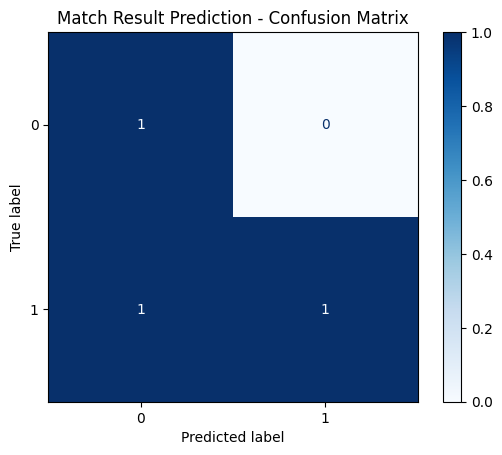


🏏 Player Performance Prediction
Predicted runs for 30 balls faced: 44.66


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


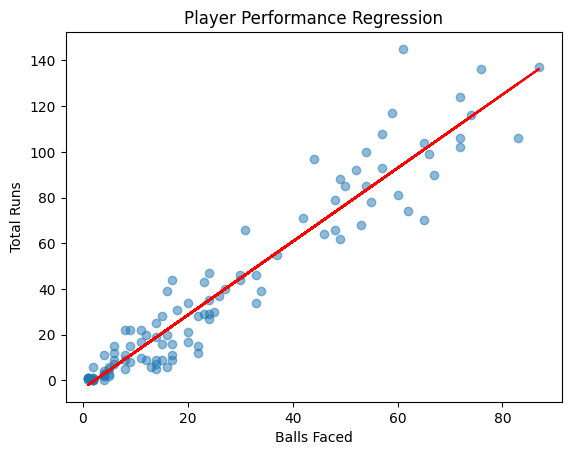


🔥 Boundary Prediction
Accuracy: 0.7539543057996485
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       441
           1       0.31      0.08      0.12       128

    accuracy                           0.75       569
   macro avg       0.55      0.51      0.49       569
weighted avg       0.68      0.75      0.69       569



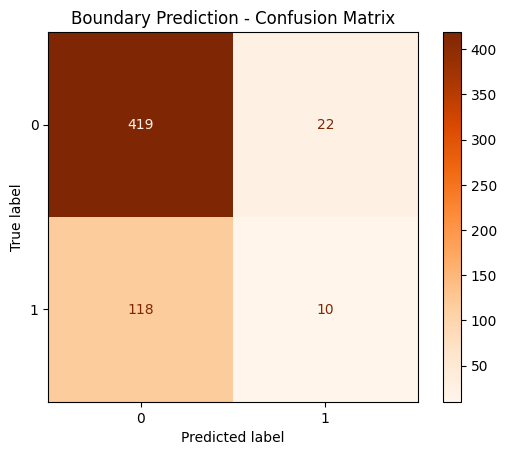

In [5]:
# IPL Match & Player Performance Predictor (Fixed for your dataset)
# Author: Pralay Bajkhan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# ============================
# 1. Load Dataset
# ============================

matches = pd.read_csv("/content/matches.csv")
deliveries = pd.read_csv("/content/deliveries.csv")

print("Matches dataset shape:", matches.shape)
print("Deliveries dataset shape:", deliveries.shape)

print("\nMatches columns:", matches.columns.tolist())
print("Deliveries columns:", deliveries.columns.tolist())

# ============================
# 2. Match Result Prediction
# ============================

if "match_winner" in matches.columns:
    matches = matches.dropna(subset=["match_winner"])
    matches["team1_win"] = (matches["match_winner"] == matches["team1"]).astype(int)

    # Use team1, team2, toss_winner, venue as features if available
    features = ["team1", "team2"]
    if "toss_winner" in matches.columns:
        features.append("toss_winner")
    if "venue" in matches.columns:
        features.append("venue")

    X_match = pd.get_dummies(matches[features], drop_first=True)
    y_match = matches["team1_win"]

    X_train, X_test, y_train, y_test = train_test_split(X_match, y_match, test_size=0.2, random_state=42)

    match_model = RandomForestClassifier(n_estimators=100, random_state=42)
    match_model.fit(X_train, y_train)
    y_pred_match = match_model.predict(X_test)

    print("\n🏆 Match Result Prediction")
    print("Accuracy:", accuracy_score(y_test, y_pred_match))
    print(classification_report(y_test, y_pred_match, zero_division=0))

    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_match)).plot(cmap="Blues")
    plt.title("Match Result Prediction - Confusion Matrix")
    plt.show()
else:
    print("\n⚠️ No 'match_winner' column found. Skipping match prediction.")

# ============================
# 3. Player Performance Prediction (Runs)
# ============================

# Aggregate player stats using striker & runs_of_bat
player_stats = deliveries.groupby("striker")["runs_of_bat"].sum().reset_index()
player_stats.rename(columns={"runs_of_bat": "total_runs"}, inplace=True)

# Balls faced by each player
balls_faced = deliveries.groupby("striker")["over"].count().reset_index()
balls_faced.rename(columns={"over": "balls_faced"}, inplace=True)

player_df = pd.merge(player_stats, balls_faced, on="striker")

# Train regression
X_player = player_df[["balls_faced"]]
y_player = player_df["total_runs"]

player_model = LinearRegression()
player_model.fit(X_player, y_player)

# Prediction example
predicted_runs = player_model.predict([[30]])[0]  # predict runs if player faces 30 balls
print("\n🏏 Player Performance Prediction")
print(f"Predicted runs for 30 balls faced: {predicted_runs:.2f}")

# Scatter plot
plt.scatter(player_df["balls_faced"], player_df["total_runs"], alpha=0.5)
plt.plot(player_df["balls_faced"], player_model.predict(X_player), color="red")
plt.xlabel("Balls Faced")
plt.ylabel("Total Runs")
plt.title("Player Performance Regression")
plt.show()

# ============================
# 4. Boundary Prediction (4s/6s)
# ============================

# Create boundary flag
deliveries["is_boundary"] = deliveries["runs_of_bat"].apply(lambda x: 1 if x in [4,6] else 0)

# Encode striker, bowler, and over
X_boundary = pd.get_dummies(deliveries[["striker", "bowler", "over"]], drop_first=True)
y_boundary = deliveries["is_boundary"]

X_train, X_test, y_train, y_test = train_test_split(X_boundary, y_boundary, test_size=0.2, random_state=42)

boundary_model = DecisionTreeClassifier(max_depth=10, random_state=42)
boundary_model.fit(X_train, y_train)
y_pred_boundary = boundary_model.predict(X_test)

print("\n🔥 Boundary Prediction")
print("Accuracy:", accuracy_score(y_test, y_pred_boundary))
print(classification_report(y_test, y_pred_boundary, zero_division=0))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_boundary)).plot(cmap="Oranges")
plt.title("Boundary Prediction - Confusion Matrix")
plt.show()
